In [9]:
import numpy as np
import pandas as pd

## Data Cleaning

##### NA values:

First we fill Other/Unknown values with NaN.

In [10]:
df = pd.read_excel("../data/Healthcare_dataset.xlsx", sheet_name="Dataset", index_col="Ptid", na_values=["Unknown", "Other/Unknown", "OB/GYN/Others/PCP/Unknown"])
df

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Ptid,,,,,,,,,,,,,,,,,,,,,
P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,NaN,N,...,N,N,N,N,N,N,N,N,N,0
P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,NaN,N,...,N,N,N,N,N,N,N,N,N,0
P3,Non-Persistent,Female,NaN,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,NaN,N,...,N,Y,N,N,N,N,N,N,N,2
P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,NaN,N,...,N,N,N,N,N,N,N,N,N,1
P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,NaN,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,NaN,N,...,N,N,Y,N,N,N,N,N,N,1
P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,NaN,Others,NaN,N,...,N,N,N,N,N,N,N,N,N,0
P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1


We replace NaN values with mode.

In [11]:
df.fillna(df.mode())

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Ptid,,,,,,,,,,,,,,,,,,,,,
P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,NaN,N,...,N,N,N,N,N,N,N,N,N,0
P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,NaN,N,...,N,N,N,N,N,N,N,N,N,0
P3,Non-Persistent,Female,NaN,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,NaN,N,...,N,Y,N,N,N,N,N,N,N,2
P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,NaN,N,...,N,N,N,N,N,N,N,N,N,1
P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,NaN,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,NaN,N,...,N,N,Y,N,N,N,N,N,N,1
P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,NaN,Others,NaN,N,...,N,N,N,N,N,N,N,N,N,0
P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1


##### outliers

We replace outliers (z-score > 3) in numeric columns with the corresponding median.

In [12]:
from scipy import stats

Dexa_Freq_During_Rx = df.Dexa_Freq_During_Rx
Count_Of_Risks = df.Count_Of_Risks

Dexa_Freq_During_Rx[(np.abs(stats.zscore(Dexa_Freq_During_Rx)) > 3)] = Dexa_Freq_During_Rx.median()
Count_Of_Risks[(np.abs(stats.zscore(Count_Of_Risks)) > 3)] = Count_Of_Risks.median()

/var/folders/55/8329xk652qqcmwyx7rj48p6m0000gn/T/ipykernel_58720/4137361993.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dexa_Freq_During_Rx[(np.abs(stats.zscore(Dexa_Freq_During_Rx)) > 3)] = Dexa_Freq_During_Rx.median()
/var/folders/55/8329xk652qqcmwyx7rj48p6m0000gn/T/ipykernel_58720/4137361993.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Count_Of_Risks[(np.abs(stats.zscore(Count_Of_Risks)) > 3)] = Count_Of_Risks.median()


## EDA

In [13]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,2.220794,1.209696
std,4.651610,1.037908
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,2.000000
max,27.000000,4.000000


##### correlation matrix

First we convert string into numbers.

In [14]:
import copy
df_num = copy.deepcopy(df)

In [15]:
for column in df.select_dtypes("object").columns:
    for i, item in enumerate(df[column].unique()):
        df_num[column][df_num[column] == item] = i
df_num

/var/folders/55/8329xk652qqcmwyx7rj48p6m0000gn/T/ipykernel_58720/3734220971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[column][df_num[column] == item] = i
/var/folders/55/8329xk652qqcmwyx7rj48p6m0000gn/T/ipykernel_58720/3734220971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[column][df_num[column] == item] = i
/var/folders/55/8329xk652qqcmwyx7rj48p6m0000gn/T/ipykernel_58720/3734220971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Ptid,,,,,,,,,,,,,,,,,,,,,
P1,0,0,0,0,0,0,0,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
P2,1,0,1,0,0,1,0,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
P3,1,1,NaN,1,1,2,0,0,NaN,0,...,0,1,0,0,0,0,0,0,0,2
P4,1,1,0,0,1,0,0,0,NaN,0,...,0,0,0,0,0,0,0,0,0,1
P5,1,1,0,0,1,0,0,0,NaN,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3420,0,1,0,0,2,0,0,0,NaN,0,...,0,0,1,0,0,0,0,0,0,1
P3421,0,1,0,0,2,0,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
P3422,0,1,0,0,2,0,2,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [30]:
corr = df_num.corr(numeric_only=False)["Persistency_Flag"]
corr

Persistency_Flag                  1.000000
Gender                            0.010343
Race                              0.009910
Ethnicity                         0.018383
Region                           -0.014778
                                    ...   
Risk_Hysterectomy_Oophorectomy    0.016106
Risk_Estrogen_Deficiency          0.012155
Risk_Immobilization               0.049787
Risk_Recurring_Falls              0.021345
Count_Of_Risks                   -0.075921
Name: Persistency_Flag, Length: 68, dtype: float64

In [32]:
corr_rank = corr.abs().sort_values()
corr_rank

Frag_Frac_Prior_Ntm                                       0.000318
Risk_Segment_During_Rx                                    0.000666
Risk_Osteogenesis_Imperfecta                              0.002636
Risk_Family_History_Of_Osteoporosis                       0.003492
Risk_Untreated_Early_Menopause                            0.005279
                                                            ...   
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms    0.322320
Comorb_Long_Term_Current_Drug_Therapy                     0.352760
Dexa_Freq_During_Rx                                       0.429316
Dexa_During_Rx                                            0.491823
Persistency_Flag                                          1.000000
Name: Persistency_Flag, Length: 68, dtype: float64

It seems that `Dexa_During_Rx`, `Dexa_Freq_During_Rx` have the most significant correlation with our target variable, `Persistency_Flag`.

##### Plots

<AxesSubplot: xlabel='Dexa_During_Rx', ylabel='Persistency_Flag'>

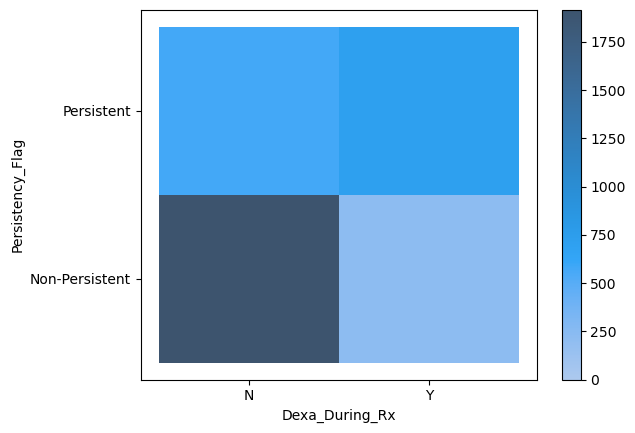

In [67]:
import seaborn as sns
sns.histplot(df, x="Dexa_During_Rx", y="Persistency_Flag", cbar=True)

Observe that N `Dexa_During_Rx` value are more likely to result in Non-Persistent `Persistency_Flag`, and vice versa.

<AxesSubplot: xlabel='Dexa_Freq_During_Rx', ylabel='Persistency_Flag'>

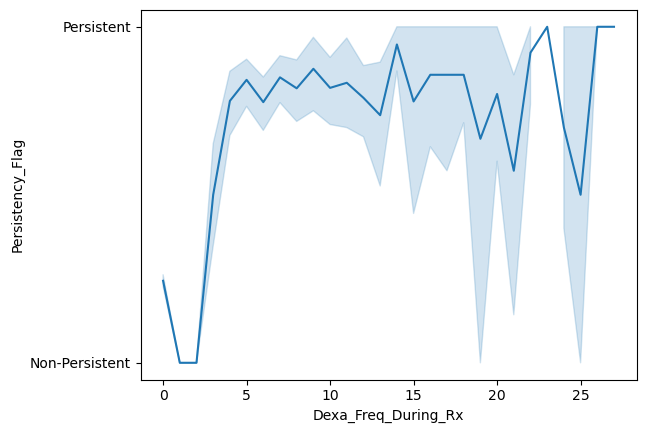

In [73]:
sns.lineplot(df, x="Dexa_Freq_During_Rx", y="Persistency_Flag")

Observe that if `Dexa_Freq_During_Rx` values are around $4$ to $11$, `Persistency_Flag` is more likely to be Persistent.